In [11]:
from google.colab import files # to import the files from the system
uploaded = files.upload()


Saving test.csv to test (1).csv


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("test.csv", encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


<Axes: xlabel='sentiment', ylabel='count'>

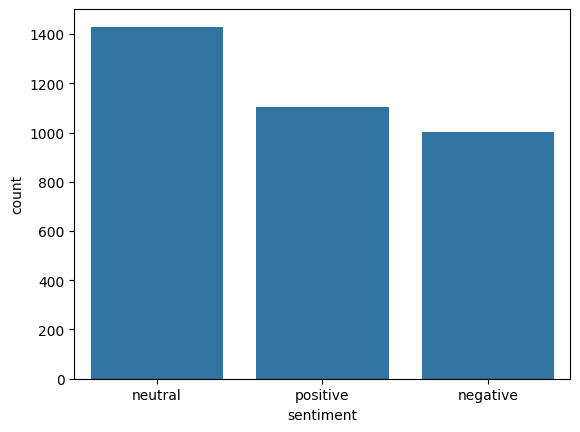

In [17]:
sns.countplot(x=df['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

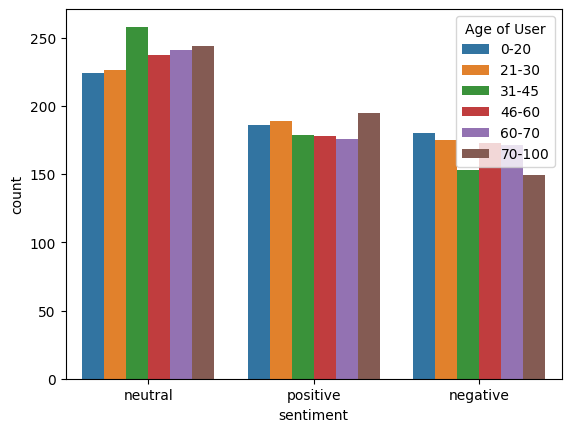

In [18]:
sns.countplot(x=df['sentiment'],hue=df['Age of User'])

In [19]:
df.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [20]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def preprocess_text(text):

    if not isinstance(text, str):

        return ''

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = [word for word in text.split() if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
df['text'] = df['text'].fillna('') # Fill missing values with empty string
df['text']=df['text'].apply(preprocess_text)
df['text'] = df['text'].astype(str)

In [28]:
X=df['text']
y=df['sentiment']

In [29]:
import tensorflow ,keras
from tensorflow.keras.preprocessing.text import Tokenizer
token=Tokenizer(oov_token="'")
token.fit_on_texts(X)
(token.word_index)

{"'": 1,
 'im': 2,
 'day': 3,
 'good': 4,
 'like': 5,
 'get': 6,
 'love': 7,
 'go': 8,
 'got': 9,
 'dont': 10,
 'know': 11,
 'cant': 12,
 'going': 13,
 'work': 14,
 'today': 15,
 'u': 16,
 'back': 17,
 'happy': 18,
 'lol': 19,
 'time': 20,
 'one': 21,
 'see': 22,
 'really': 23,
 'much': 24,
 'well': 25,
 'think': 26,
 'night': 27,
 'oh': 28,
 'new': 29,
 'want': 30,
 'still': 31,
 'miss': 32,
 'thanks': 33,
 'thats': 34,
 'last': 35,
 'home': 36,
 'need': 37,
 'mothers': 38,
 'feel': 39,
 'sad': 40,
 'hope': 41,
 'great': 42,
 'would': 43,
 'haha': 44,
 'ive': 45,
 'ill': 46,
 'tomorrow': 47,
 'twitter': 48,
 'right': 49,
 'morning': 50,
 'could': 51,
 'wish': 52,
 'though': 53,
 'fun': 54,
 'better': 55,
 'gonna': 56,
 'tonight': 57,
 'bad': 58,
 'nice': 59,
 'getting': 60,
 'sorry': 61,
 'never': 62,
 'didnt': 63,
 'sleep': 64,
 'watching': 65,
 'hey': 66,
 'even': 67,
 'school': 68,
 'youre': 69,
 'weekend': 70,
 'make': 71,
 'bed': 72,
 'made': 73,
 'yes': 74,
 'people': 75,
 'come

In [30]:
max(token.word_index)

'zsnagy'

In [32]:
sentences=token.texts_to_sequences(X)
len(sentences)

4815

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(sentences,padding='pre')
padded.shape

(4815, 21)

In [45]:
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing sentiment values
df.dropna(subset=['sentiment'], inplace=True)

encode=LabelEncoder()
y=encode.fit_transform(df['sentiment'])

In [46]:
from keras import Sequential
from keras.layers import Dense,LSTM , Dropout ,Embedding

In [47]:
model=Sequential()
model.add(Embedding(len(token.word_index) + 1, 2, input_length=padded.shape[1]))
model.add(LSTM(150))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
max(len(x) for x in sentences)

21

In [43]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [49]:
model=Sequential()
model.add(Embedding(len(token.word_index) + 1, 2, input_length=padded.shape[1]))
model.add(LSTM(150))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [55]:
df.dropna(subset=['sentiment'], inplace=True)
X = df['text']
y = df['sentiment']

token = Tokenizer(oov_token="'")
token.fit_on_texts(X)
sentences = token.texts_to_sequences(X)
padded = pad_sequences(sentences, padding='pre', maxlen=21) # Use the determined maxlen

In [53]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(y)

In [54]:
model.fit(padded, y, epochs=5)

Epoch 1/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - Accuracy: 0.3725 - loss: 1.0928
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - Accuracy: 0.4178 - loss: 1.0733
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - Accuracy: 0.5286 - loss: 0.9889
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - Accuracy: 0.6439 - loss: 0.7696
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - Accuracy: 0.7432 - loss: 0.6180


In [57]:
# Read the test data from the uploaded file
test_df = pd.read_csv("test.csv", encoding='latin-1')

# Preprocess the text data in the test DataFrame
test_df['text'] = test_df['text'].fillna('')
test_df['text'] = test_df['text'].apply(preprocess_text)
test_sentences = token.texts_to_sequences(test_df['text'])
test_padded = pad_sequences(test_sentences, padding='pre', maxlen=padded.shape[1])
display(test_padded)

array([[   0,    0,    0, ..., 1113,    3, 2413],
       [   0,    0,    0, ..., 1524, 2418, 2419],
       [   0,    0,    0, ..., 2422, 1526,  488],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [59]:
np.argmax(model.predict(test_padded))

151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


np.int64(1990)

In [62]:
df = pd.read_csv("test.csv", encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
